In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:/Users/ajadhav/Downloads/Total_Data/Total_Data.csv")

In [2]:
df.head()

,Host,Date,CPU1_Temp,BMC_Health_Status,Memory_Usage,Available_Memory,Total_Memory,CPU_Health,CPU_Usage,FAN_1_Health,...,FAN_1_Speed,FAN_2_Speed,FAN_3_Speed,FAN_4_Speed,Memory_Health_Status,Power_State,Power_Available_Watts,Power_Capacity_Watts,Power_Requested_Watts,Power_Usage_Watts
0,10.101.1.2,2019-08-14:11:59:00,74.0,OK,66.212,125.696,191.908,OK,0.796528,OK,...,11340.0,11340.0,11480.0,11480.0,OK,On,0.0,560.0,430.0,336.0
1,10.101.1.2,2019-08-14:11:58:00,75.0,OK,66.213,125.695,191.908,OK,0.785417,OK,...,11270.0,11270.0,11270.0,11270.0,OK,On,0.0,560.0,430.0,340.0
2,10.101.1.2,2019-08-14:11:57:00,75.0,OK,66.214,125.694,191.908,OK,0.754167,OK,...,10850.0,10850.0,10850.0,10920.0,OK,On,0.0,560.0,430.0,325.0
3,10.101.1.2,2019-08-14:11:56:00,76.0,OK,66.208,125.700,191.908,OK,0.772222,OK,...,10850.0,10920.0,10920.0,10920.0,OK,On,0.0,560.0,430.0,330.0
4,10.101.1.2,2019-08-14:11:55:00,74.0,OK,66.208,125.700,191.908,OK,0.772222,OK,...,10710.0,10850.0,10850.0,10920.0,OK,On,0.0,560.0,430.0,346.0


In [3]:
df.columns

Index(['Host', 'Date', 'CPU1_Temp', 'BMC_Health_Status', 'Memory_Usage',
       'Available_Memory', 'Total_Memory', 'CPU_Health', 'CPU_Usage',
       'FAN_1_Health', 'FAN_2_Health', 'FAN_3_Health', 'FAN_4_Health',
       'FAN_1_Speed', 'FAN_2_Speed', 'FAN_3_Speed', 'FAN_4_Speed',
       'Memory_Health_Status', 'Power_State', 'Power_Available_Watts',
       'Power_Capacity_Watts', 'Power_Requested_Watts', 'Power_Usage_Watts'],
      dtype='object')

In [4]:
df.shape

(192425, 23)

In [5]:
unsued_Columns = ['Host','CPU_Health','BMC_Health_Status','FAN_1_Health','FAN_2_Health','FAN_3_Health','FAN_4_Health','Memory_Health_Status','Power_State','Power_Available_Watts']
df.drop(unsued_Columns, axis=1, inplace=True)

In [6]:
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d:%H:%M:%S')

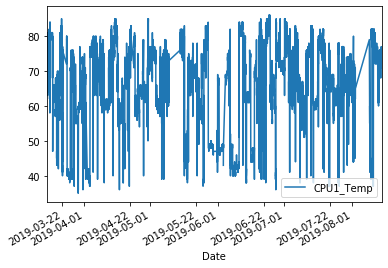

In [7]:
C=df[['Date','CPU1_Temp']]
C.set_index('Date').plot()

C:\Users\ajadhav\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


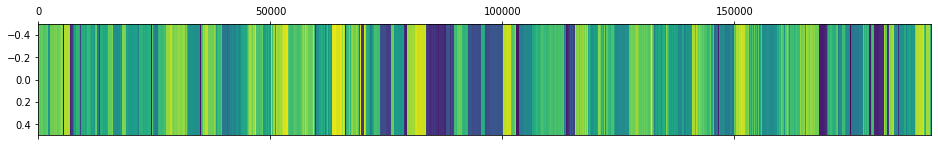

In [8]:
C.index = C.Date
C.drop('Date',axis=1,inplace= True)
C = C.T
plt.matshow(C, interpolation=None, aspect='auto')

In [9]:
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Hour'] = df.Date.dt.hour
#df.drop('Date',axis=1,inplace=True)

In [10]:
df = df.fillna(method='ffill')

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('CPU1_Temp',axis=1), df.CPU1_Temp , test_size=0.33, random_state=42)

In [12]:
test_dates = X_test.Date
X_test.drop('Date',axis=1,inplace=True)
X_train.drop('Date',axis=1,inplace=True)


In [13]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred_rf, y_test))

C:\Users\ajadhav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.1863720545926841

In [14]:
# #SVR
# from sklearn.svm import SVR
# clf = SVR(C=1.0, epsilon=0.2)
# clf.fit(X_train,y_train)
# y_pred_svm = clf.predict(X_test)
# np.sqrt(mean_squared_error(y_pred_svm, y_test))


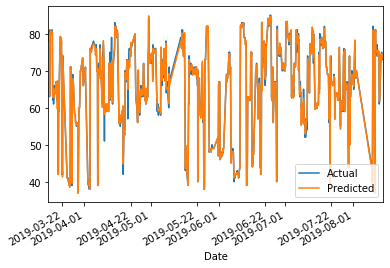

In [15]:
OP = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_rf})
OP.index  = test_dates
OP.iloc[:1000,:].plot()

In [16]:
#XGB
import xgboost

model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [17]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.75,
             reg_lambda=0.45, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method=None, validate_parameters=False, verbosity=None)

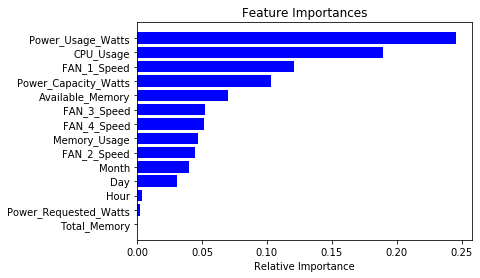

In [18]:
#Feature importance
features = X_test.columns.values
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [19]:
y_pred = model.predict(X_test)

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred, y_test))

1.3024598752308476

In [21]:
#for given input values lets check the prediction and compare it with actual value

In [22]:
X_test.iloc[0,:]

Memory_Usage               72.142000
Available_Memory          119.766000
Total_Memory              191.908000
CPU_Usage                   0.801528
FAN_1_Speed              9800.000000
FAN_2_Speed              9800.000000
FAN_3_Speed              9800.000000
FAN_4_Speed              9800.000000
Power_Capacity_Watts      560.000000
Power_Requested_Watts     430.000000
Power_Usage_Watts         331.000000
Month                       7.000000
Day                         1.000000
Hour                       14.000000
Name: 53401, dtype: float64

In [23]:
model.predict(pd.DataFrame((X_test.iloc[2,:])).transpose())

array([47.140553], dtype=float32)

In [24]:
y_test.values[2]

47.0

In [25]:
#our predicted value comes out to 47.140553

# and actual values was 47.0.

# predictions are very good 

In [26]:
Memory_Usage  =             72.142000
Available_Memory =          119.766000
Total_Memory      =        191.908000
CPU_Usage       =         0.801528
FAN_1_Speed      =        9800.000000
FAN_2_Speed       =       9800.000000
FAN_3_Speed        =      9800.000000
FAN_4_Speed         =     9800.000000
Power_Capacity_Watts =     560.000000
Power_Requested_Watts =    430.000000
Power_Usage_Watts      =   331.000000
Month                   =    7.000000
Day                      =   1.000000
Hour  =   14.000000

In [27]:
testset = pd.DataFrame({'Memory_Usage':[Memory_Usage], 'Available_Memory':[Available_Memory], 'Total_Memory':[Total_Memory],
              'CPU_Usage':[CPU_Usage],
       'FAN_1_Speed':[FAN_1_Speed], 'FAN_2_Speed':[FAN_2_Speed], 'FAN_3_Speed':[FAN_3_Speed], 
              'FAN_4_Speed':[FAN_4_Speed],
       'Power_Capacity_Watts':[Power_Capacity_Watts], 'Power_Requested_Watts':[Power_Requested_Watts], 
              'Power_Usage_Watts':[Power_Usage_Watts],
       'Month':[Month], 'Day':[Day], 'Hour':[Hour]})

In [28]:
model.predict(testset)

array([82.53873], dtype=float32)